# Exploratory data analysis for iris dataset

In [5]:
## Boiler plate

import numpy as np
import matplotlib.pyplot as plt
import os

figdir = "../figures"
def save_fig(fname):
    if figdir:
        plt.savefig(os.path.join(figdir, fname))

import sklearn

import pandas as pd
pd.set_option('precision', 2) # 2 decimal places
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 100) # wide windows

In [9]:
# Get the iris dataset and look at it
from sklearn.datasets import load_iris
iris = load_iris()
# show attributes of this object
print(dir(iris))

# Extract numpy arrays
X = iris.data 
y = iris.target
print(np.shape(X)) # (150, 4)
print(np.c_[X[0:3,:], y[0:3]]) # concatenate columns

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
(150, 4)
[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]]


In [10]:
# The data is sorted by class. Let's shuffle the rows.
N = np.shape(X)[0]
rng = np.random.RandomState(42)
perm = rng.permutation(N)
X = X[perm]
y = y[perm]
print(np.c_[X[0:3,:], y[0:3]])

[[6.1 2.8 4.7 1.2 1. ]
 [5.7 3.8 1.7 0.3 0. ]
 [7.7 2.6 6.9 2.3 2. ]]


In [12]:
# Convert to pandas dataframe 
df = pd.DataFrame(data=X, columns=['sl', 'sw', 'pl', 'pw'])
# create column for labels
df['label'] = pd.Series(iris.target_names[y], dtype='category')

In [13]:
# Summary statistics
df.describe(include='all')


,sl,sw,pl,pw,label
count,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.84,3.06,3.76,1.20,NaN
std,0.83,0.44,1.77,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.35,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


In [14]:
# Peak at the data
df.head()

,sl,sw,pl,pw,label
0,6.1,2.8,4.7,1.2,versicolor
1,5.7,3.8,1.7,0.3,setosa
2,7.7,2.6,6.9,2.3,virginica
3,6.0,2.9,4.5,1.5,versicolor
4,6.8,2.8,4.8,1.4,versicolor


In [16]:
# Create latex table from first 5 rows 
str = df[:6].to_latex(index=False, escape=False)
print(str)

\begin{tabular}{rrrrl}
\toprule
  sl &   sw &   pl &   pw &       label \\
\midrule
 6.1 &  2.8 &  4.7 &  1.2 &  versicolor \\
 5.7 &  3.8 &  1.7 &  0.3 &      setosa \\
 7.7 &  2.6 &  6.9 &  2.3 &   virginica \\
 6.0 &  2.9 &  4.5 &  1.5 &  versicolor \\
 6.8 &  2.8 &  4.8 &  1.4 &  versicolor \\
 5.4 &  3.4 &  1.5 &  0.4 &      setosa \\
\bottomrule
\end{tabular}



/home/murphyk/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


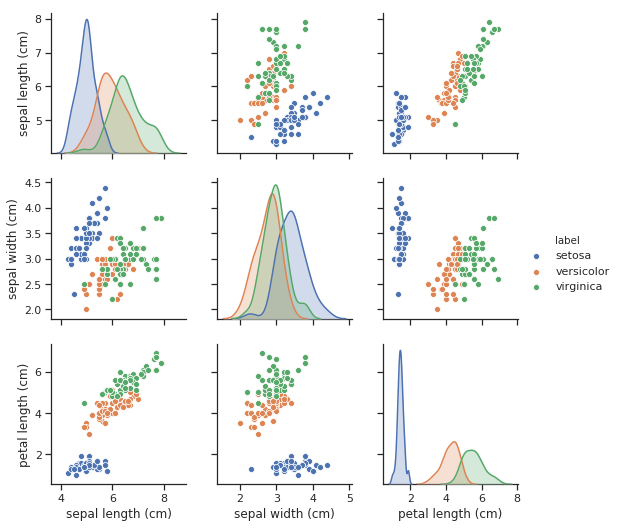

In [18]:
# 2d scatterplot
#https://seaborn.pydata.org/generated/seaborn.pairplot.html
import seaborn as sns;
sns.set(style="ticks", color_codes=True)
# Make a dataframe with nicer labels for printing
#iris_df = sns.load_dataset("iris")
iris_df = df.copy()
iris_df.columns = iris['feature_names'] + ['label'] 
g = sns.pairplot(iris_df, vars = iris_df.columns[0:3] , hue="label")
save_fig("iris-scatterplot.pdf")
plt.show()